In [2]:
import fastai 
from fastai.vision import *

In [57]:
df = pd.read_csv("newdata_224/labels.csv")
df.head()

,name,tags
0,train/image7997_37xxx.png,3 07
1,train/image4591_30xxx.png,3 00
2,train/image8945_64xxx.png,6 04
3,train/image16381_2627x.png,2 06 002 0007
4,train/image2431_21xxx.png,2 01


In [69]:
svhn = Path("/home",'tako','devtools','SVHN',"newdata_224",)
def is_valid(x):
    if "valid" in str(x):
        return True
    if 'test' in str(x):
        return True
    return False
labels = "train_valid_labels.csv"
# labels = "train_test_labels.csv"
# labels = "train_extra_valid_labels.csv"

tfms = get_transforms(do_flip=False)
data = (ImageItemList.from_csv(svhn,csv_name=labels)
             .split_by_valid_func(is_valid)
             .label_from_df()
             .transform(tfms, size=64)
             .databunch()
             .normalize(imagenet_stats)
            )
data 

/home/tako/devtools/test_env/env-ai-37/lib/python3.7/site-packages/fastai/data_block.py:475: UserWarning: You are labelling your items with CategoryList.
Your valid set contained the folowing unknown labels, the corresponding items have been discarded.
8 04 008, 1 03 008 0006, 9 00 005, 7 07 006, 4 08 004 0007...
  if getattr(ds, 'warn', False): warn(ds.warn)


ImageDataBunch;

Train: LabelList
y: CategoryList (31669 items)
[Category 3 07, Category 3 00, Category 6 04, Category 2 06 002 0007, Category 2 01]...
Path: /home/tako/devtools/SVHN/newdata_224
x: ImageItemList (31669 items)
[Image (3, 224, 224), Image (3, 224, 224), Image (3, 224, 224), Image (3, 224, 224), Image (3, 224, 224)]...
Path: /home/tako/devtools/SVHN/newdata_224;

Valid: LabelList
y: CategoryList (1703 items)
[Category 1 08 003, Category 6 08, Category 1 08, Category 1 07 008, Category 9 07]...
Path: /home/tako/devtools/SVHN/newdata_224
x: ImageItemList (1703 items)
[Image (3, 224, 224), Image (3, 224, 224), Image (3, 224, 224), Image (3, 224, 224), Image (3, 224, 224)]...
Path: /home/tako/devtools/SVHN/newdata_224;

Test: None

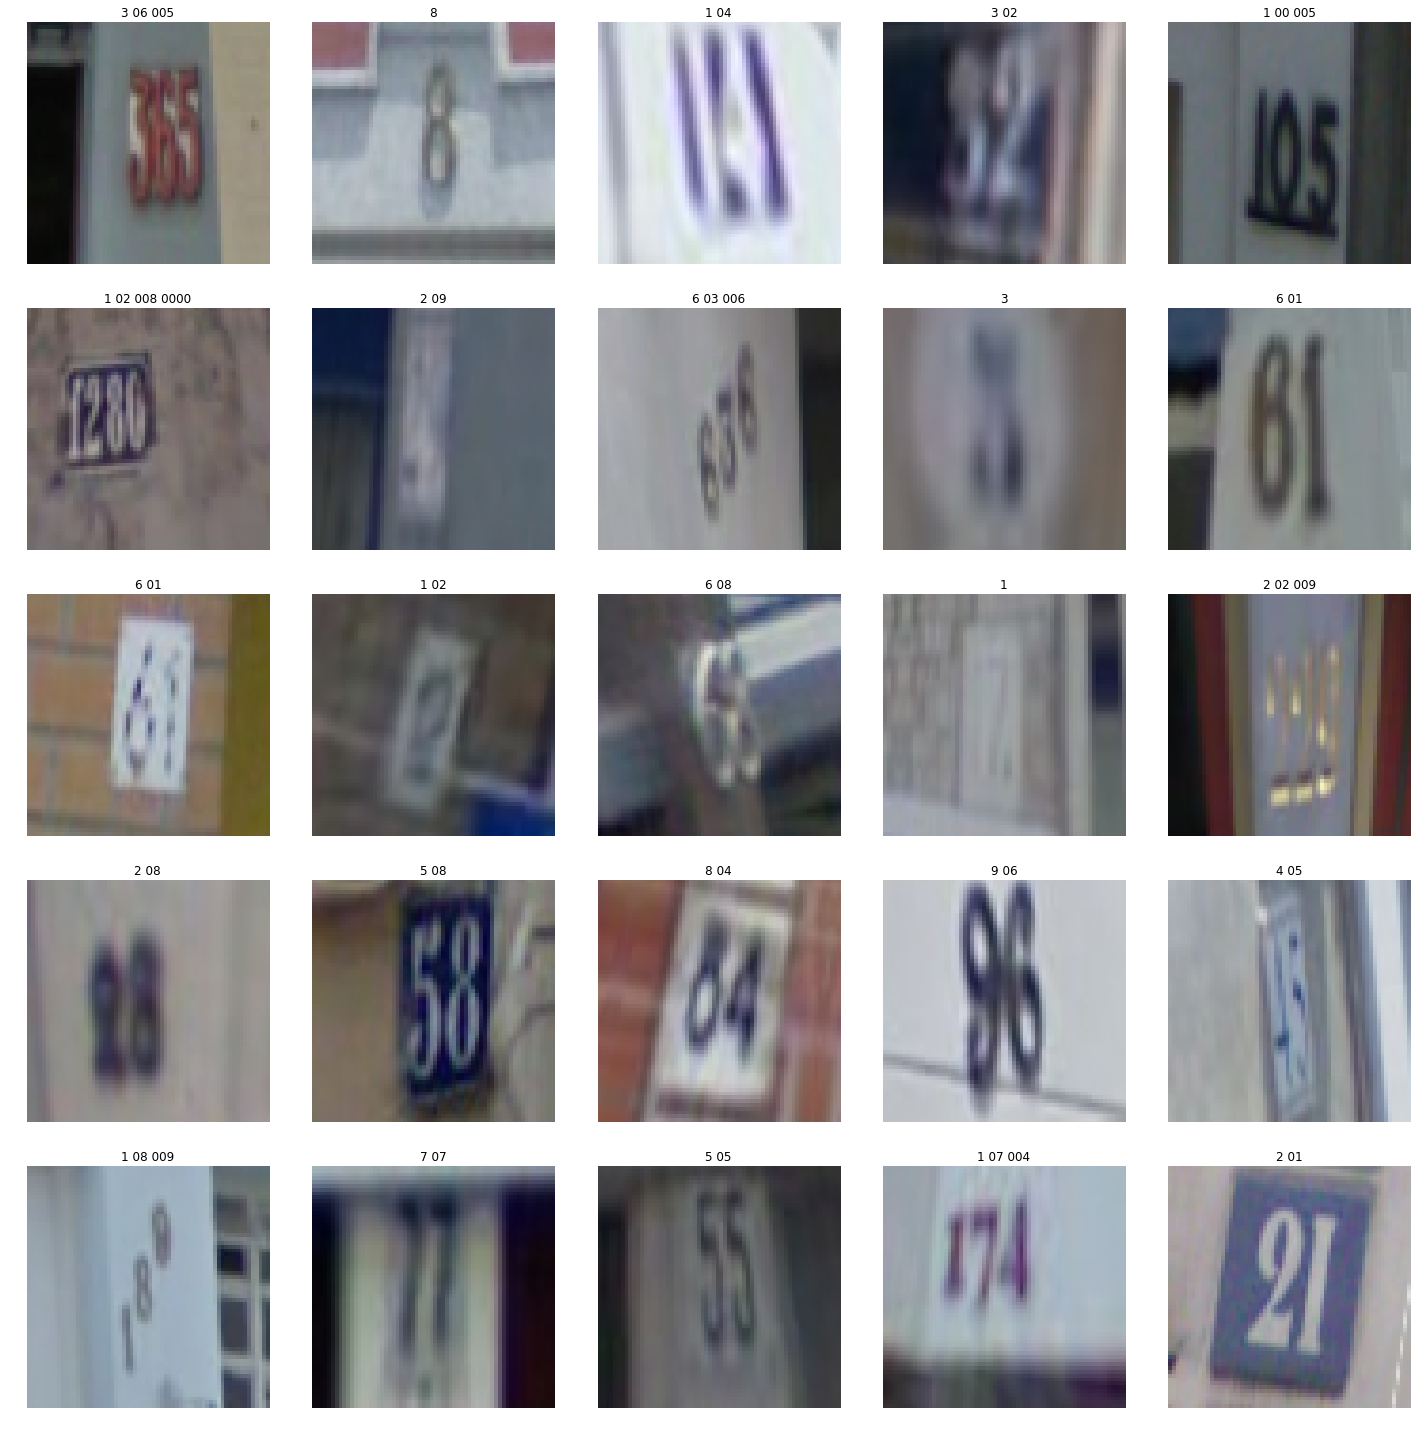

In [70]:
data.show_batch()

In [85]:
learn = create_cnn(data, models.resnet18, metrics=accuracy)
learn.fit_one_cycle(5,1e-2)
learn.save('mini_train')

epoch,train_loss,valid_loss,accuracy
1,5.252332,4.769760,0.108045
2,4.300597,3.972121,0.231944
3,3.821287,3.413964,0.320023
4,3.605383,3.105610,0.387551
5,3.392267,3.017058,0.404580


In [ ]:
learn.fit_one_cycle(5,1e-2)

In [86]:

preds,y,losses = learn.get_preds(with_loss=True)
interp = ClassificationInterpretation(data, preds, y, losses)

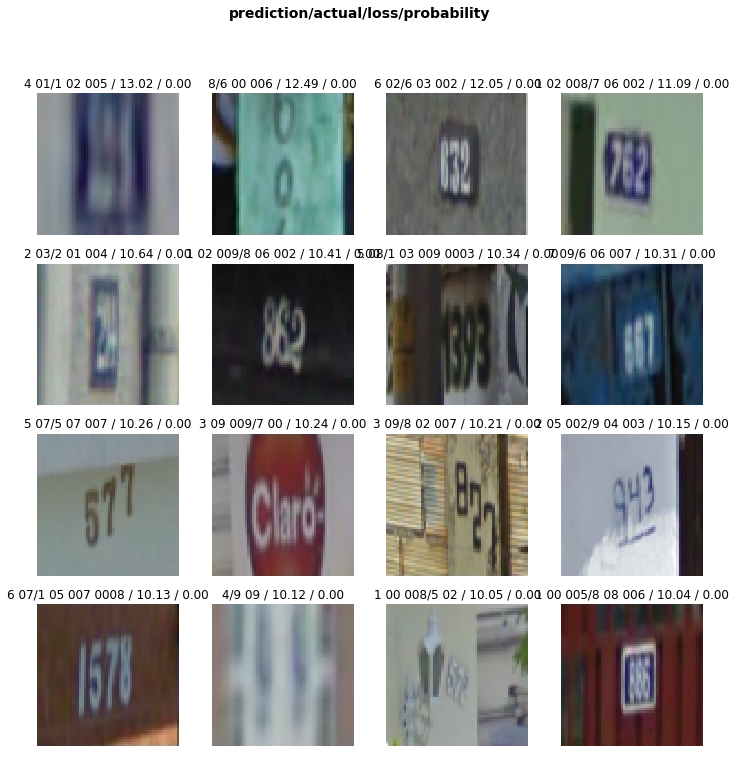

In [87]:

interp.plot_top_losses(16)